In [1]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns        

## ALL plots that can be used for each individual chapter

# H1: Plots Examples

In [2]:
ais = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/ais.csv')
print(ais.head())

   id   rcc  wcc    hc    hg  ferr    bmi    ssf  pcBfat    lbm     ht    wt  \
0   1  3.96  7.5  37.5  12.3    60  20.56  109.1   19.75  63.32  195.9  78.9   
1   2  4.41  8.3  38.2  12.7    68  20.67  102.8   21.30  58.55  189.7  74.4   
2   3  4.14  5.0  36.4  11.6    21  21.86  104.6   19.88  55.36  177.8  69.1   
3   4  4.11  5.3  37.3  12.6    69  21.88  126.4   23.66  57.18  185.0  74.9   
4   5  4.45  6.8  41.5  14.0    29  18.96   80.3   17.64  53.20  184.6  64.6   

  sex   sport  
0   f  B_Ball  
1   f  B_Ball  
2   f  B_Ball  
3   f  B_Ball  
4   f  B_Ball  


## Qualitative Variables

### Visualisation using a Bar Chart

<Axes: xlabel='sport', ylabel='count'>

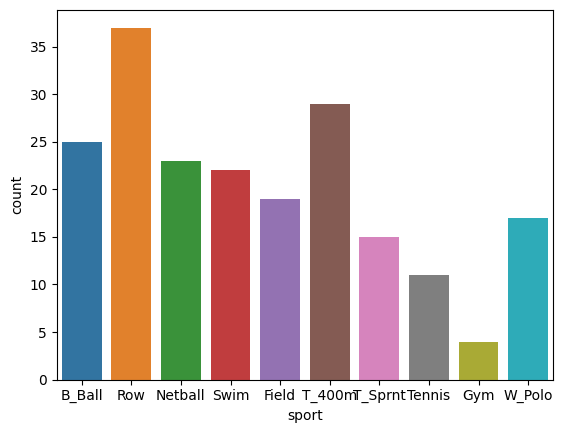

In [3]:
sns.countplot(data=ais, x='sport',hue='sport')

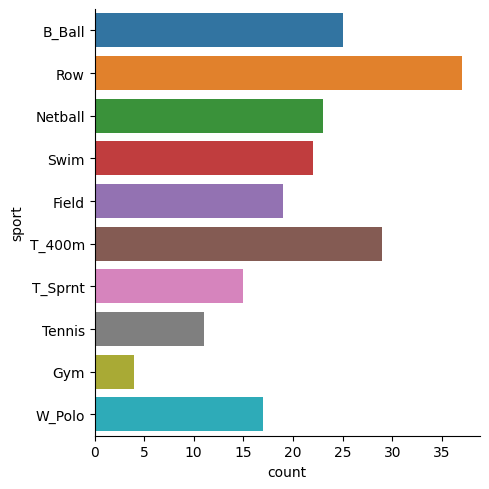

In [4]:
sns.catplot(data = ais, kind = "count", y = "sport",hue='sport')

## Quantitative Variables


### Visualisation

<Axes: xlabel='bmi'>

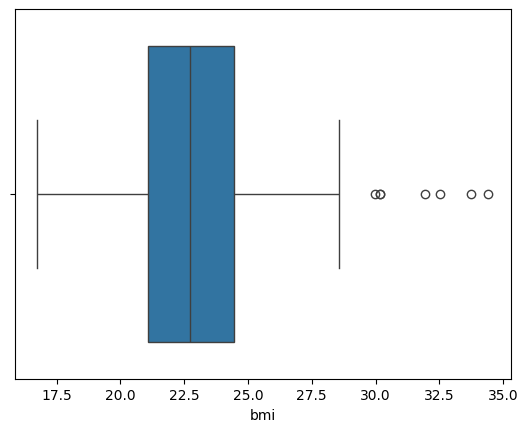

In [5]:
# Visualisation using a box plot (Seaborn)
sns.boxplot(data = ais, x = "bmi")

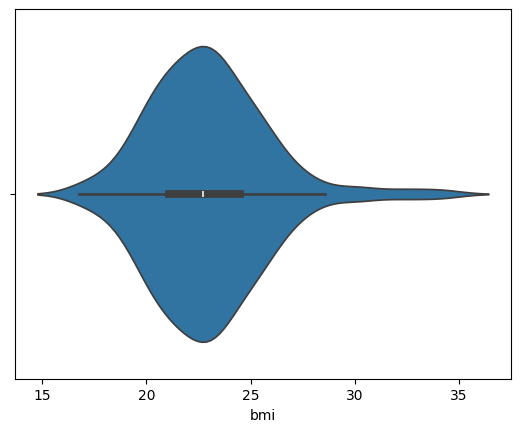

In [6]:
# Violin plot (Seaborn)
sns.violinplot(data = ais, x = "bmi");

<Axes: xlabel='bmi', ylabel='Density'>

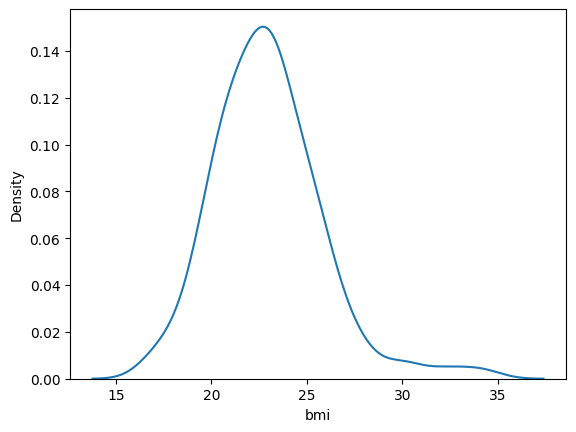

In [7]:
# Probability density plot (Seaborn)
sns.kdeplot(x = ais["bmi"])

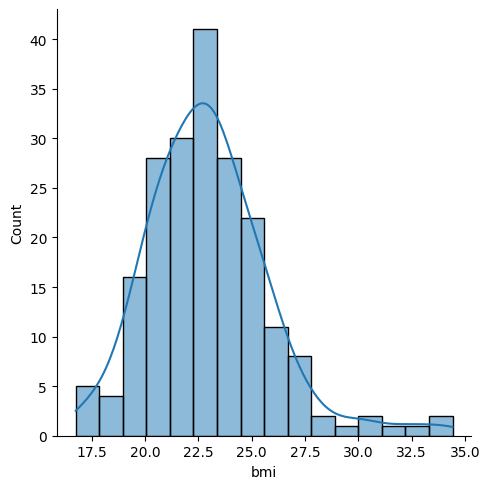

In [8]:
# We can combine a kernel density plot with a histogram.  
# In a histogram, the area of each bar is proportional to the frequency in the interval. When the intervals are not of equals width, the height of the bar is the frequency density and it must be scaled.
sns.displot(x = ais["bmi"], kde=True)

# H2: Plotting based on measurement level

![alt text](https://miro.medium.com/v2/resize:fit:926/1*aKQGyZThERfCfiKAK9MIzg.png "Title")

### plotting Qualitative/Qualitative

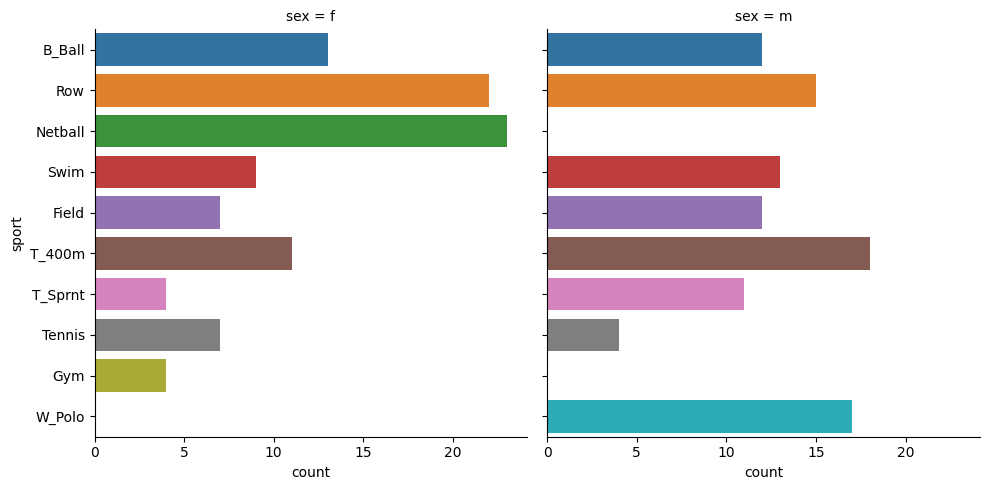

In [9]:
sns.catplot(data = ais, kind = "count",col='sex', y = "sport",hue="sport")

<Axes: xlabel='ht', ylabel='Density'>

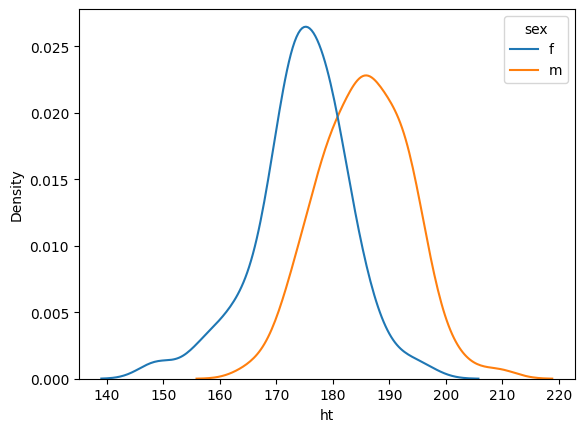

In [10]:
sns.kdeplot(x = ais['ht'], hue= ais['sex']) #density plot by category

<Axes: xlabel='sex', ylabel='count'>

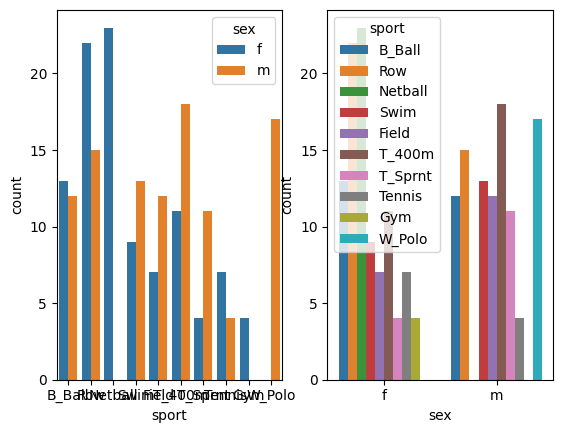

In [11]:
fig, axs = plt.subplots(ncols=2)

sns.countplot(data = ais, x = "sport",hue='sex',  ax = axs[0])

sns.countplot(data = ais, x = "sex",hue='sport',  ax = axs[1])

### plotting Qualitative/Quantitative

<Axes: xlabel='ht', ylabel='sex'>

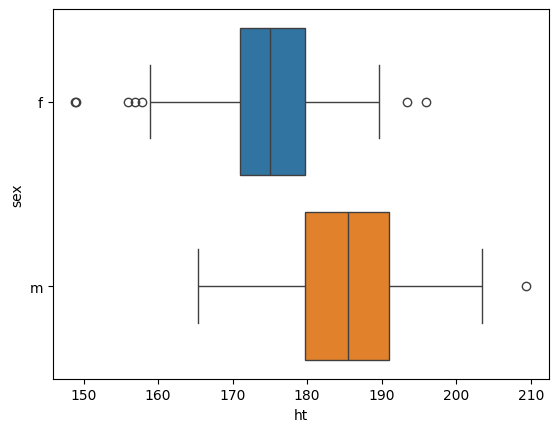

In [12]:
sns.boxplot(data = ais, x = "ht", y='sex',hue='sex')

<Axes: xlabel='ht', ylabel='sport'>

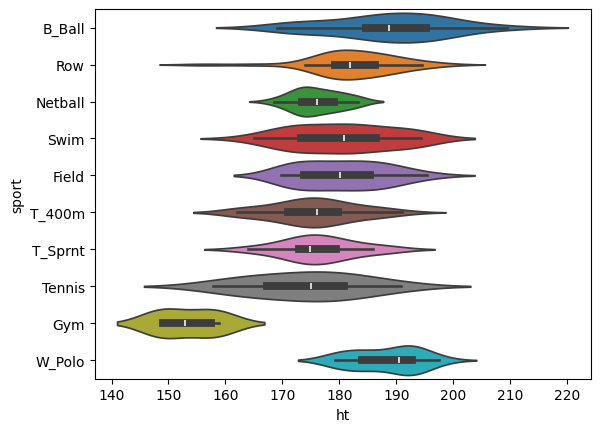

In [13]:
sns.violinplot(data = ais, x = "ht", y= ais['sport'],hue=ais['sport'])

### plotting Quantitative/Quantitative

<Axes: xlabel='wt', ylabel='ht'>

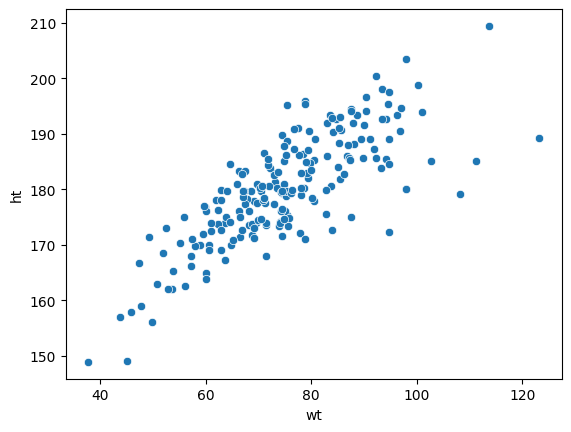

In [14]:
sns.scatterplot(x=ais['wt'],y=ais['ht'])


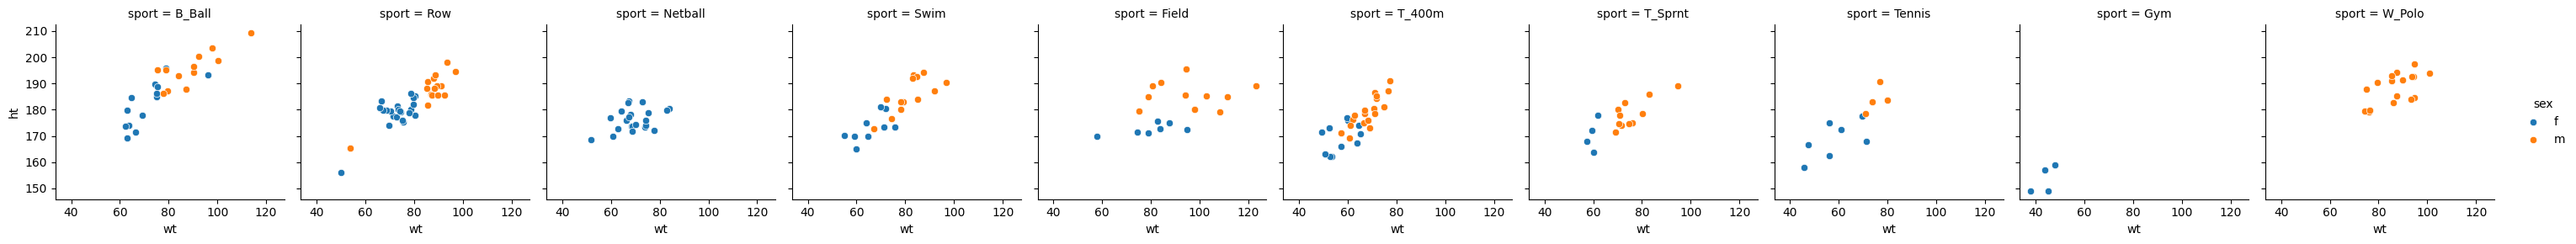

In [15]:
g = sns.FacetGrid(ais,col="sport",hue='sex')
g.map(sns.scatterplot, "wt","ht")
g.add_legend()

# H3: Plotting distribution plots

## Single tailed z-test and t-test
The $z$-test is used to confirm or refute an assumption about the (unknown) *population mean*, based on a sufficiently large sample.
The single tailed $z$-test is used to confirm whether a sample is smaller/greater then the imposed significance level. When m0 > sm we use a left tailed test otherwise we use a right tailed test as u can see by refreshing this cell.

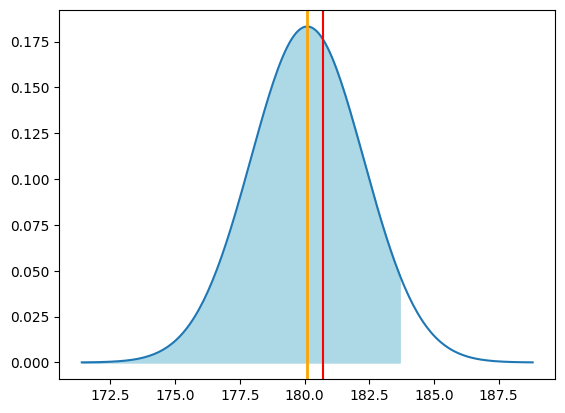

In [16]:
# Gauss-curve plot:
random=np.random.choice(ais["ht"],20,replace=True)
n=len(random)   # sample size
sm=random.mean()    # sample mean
a = 0.05            # significance level (chosen by the researcher)
m0=ais["ht"].mean() # hypothetical population mean (H0)
s=ais["ht"].std()   # population standard deviation (assumed to be known)
g = stats.norm.isf(a, loc=m0, scale=s / np.sqrt(n)) #

# X-values
dist_x = np.linspace(m0 - 4 * s/np.sqrt(n), m0 + 4 * s/np.sqrt(n), num=201)
# Y-values for the Gauss curve
dist_y = stats.norm.pdf(dist_x, m0, s/np.sqrt(n))
# Plot the Gauss-curve
dplot=plt.gca()
dplot.plot(dist_x, dist_y)
# Show the hypothetical population mean with an orange line
dplot.axvline(m0, color="orange", lw=2)
# Show the sample mean with a red line
dplot.axvline(sm, color="red")
# Fill the acceptance area in light blue
if (sm<m0):
    dplot.fill_between(dist_x, 0, dist_y, where=dist_x >= m0-(g-m0), color='lightblue')
else:
    dplot.fill_between(dist_x, 0, dist_y, where=dist_x <= g, color='lightblue')

## Two tailed z-test and t-test
When we don't want to test whether the population mean is either greater or lower than a hypothetical value, but only want to know if the sample mean is "close enough", we can use a two-tailed $z$-test.


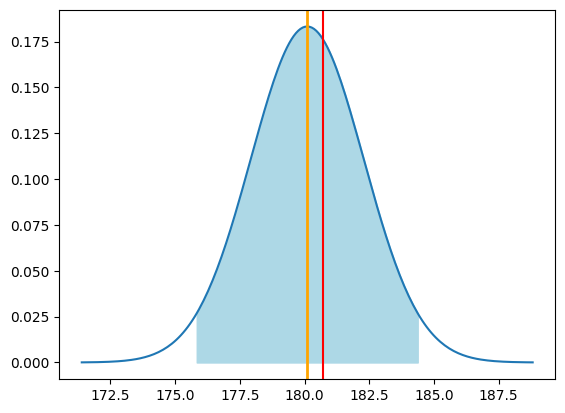

In [17]:
g1 = m0 - stats.norm.isf(a/2) * s / np.sqrt(n)
g2 = m0 + stats.norm.isf(a/2) * s / np.sqrt(n)
# Gauss-curve
# X-values
dist_x = np.linspace(m0 - 4 * s/np.sqrt(n), m0 + 4 * s/np.sqrt(n), num=201)
# Y-values
dist_y = stats.norm.pdf(dist_x, loc=m0, scale=s/np.sqrt(n))
fig, dplot = plt.subplots(1, 1)
# Plot
dplot.plot(dist_x, dist_y)
# Hypothetical population mean in orange
dplot.axvline(m0, color="orange", lw=2)
# Sample mean in red
dplot.axvline(sm, color="red")
acc_x = np.linspace(g1, g2, num=101)
acc_y = stats.norm.pdf(acc_x, loc=m0, scale=s/np.sqrt(n))
# Fill the acceptance region in light blue
dplot.fill_between(acc_x, 0, acc_y, color='lightblue')

# H4 : plots for Quantative/Quantative data

D:\ProgramData\TEMP\ipykernel_25796\1220078771.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plasma_colors = cm.get_cmap('plasma')


{'B_Ball': 1, 'Row': 2, 'Netball': 3, 'Swim': 4, 'Field': 5, 'T_400m': 6, 'T_Sprnt': 7, 'Tennis': 8, 'Gym': 9, 'W_Polo': 10}


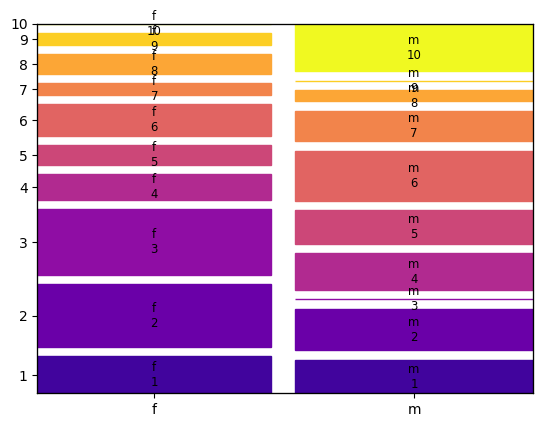

In [18]:
from matplotlib import cm

# By default, mosaic() will color all columns the same. Here,
# we're going to give a separate color to each response (1-5).
# The response is kept in the label of each cell, a tuple of
# the two values that are represented in that cell (e.g. 
# ('Female', '2')). We will be using the "plasma" color map
# in this example.
plasma_colors = cm.get_cmap('plasma')
# Create a function that maps the cell key to the color we
# want to give it. We use the colormap function created above
# and give it a number between 0 and 1. We convert the second
# part of the key (values '1' to '5') to a number and divide
# by 5.
make_dict=dict([(key, value)
          for i, (key, value) in enumerate(zip(ais['sport'].unique(), np.linspace(1,len(ais['sport'].unique())+1,num=len(ais['sport'].unique())+1, dtype = int)))])


make_dict=dict([(key, value) for (key, value)  in zip(ais['sport'].unique(),[int(i) for i in range(1,len(ais['sport'].unique())+1)])]) #alternative faster

print(make_dict)

ais['survey']=ais['sport'].map(make_dict)
props = lambda key: {'color': plasma_colors(int(key[1])/len(ais.sport.unique()))}

mos_gender_survey = mosaic(
       data=ais, index=['sex', 'survey'],
       gap=0.05, properties=props)

<Axes: ylabel='sex'>

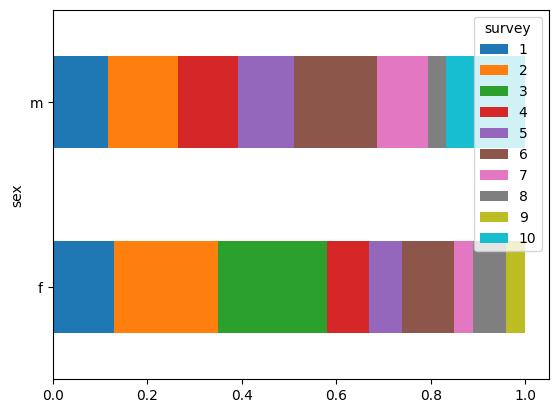

In [19]:
# Contingency table without the margins
observed_p = pd.crosstab(ais.sex, ais.survey, normalize='index')

# Horizontally oriented stacked bar chart
observed_p.plot(kind='barh', stacked=True)

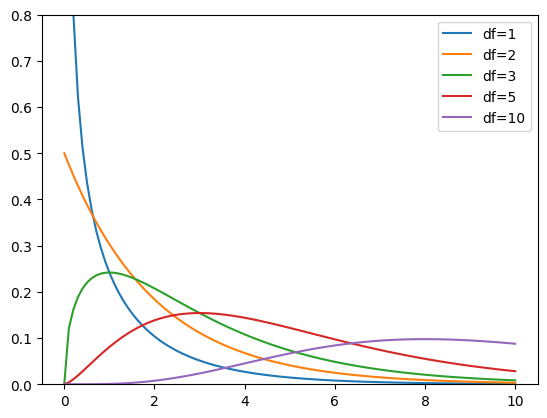

In [20]:
# Plot of the chi-squared distribution for different degrees of freedom
x = np.linspace(0, 10, num=100)
tplot = plt.gca()
tplot.set_ylim([0, 0.8])
tplot.plot(x, stats.chi2.pdf(x, 1), label="df=1") 
tplot.plot(x, stats.chi2.pdf(x, 2), label="df=2") 
tplot.plot(x, stats.chi2.pdf(x, 3), label="df=3")
tplot.plot(x, stats.chi2.pdf(x, 5), label="df=5")
tplot.plot(x, stats.chi2.pdf(x, 10), label="df=10")
tplot.legend(loc='best')

<Axes: xlabel='sport', ylabel='m'>

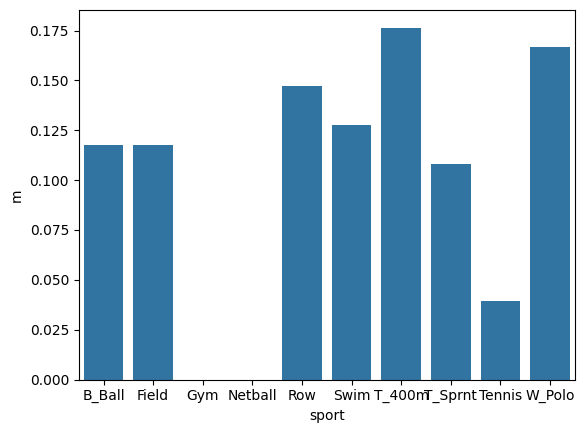

In [21]:
observed = pd.crosstab(ais.sport,ais.sex)
setsex='m'
sns.barplot(x = observed.loc[:, setsex].index, y = observed.loc[:, setsex] / np.sum(observed.loc[:, setsex]))

<Axes: xlabel='sex'>

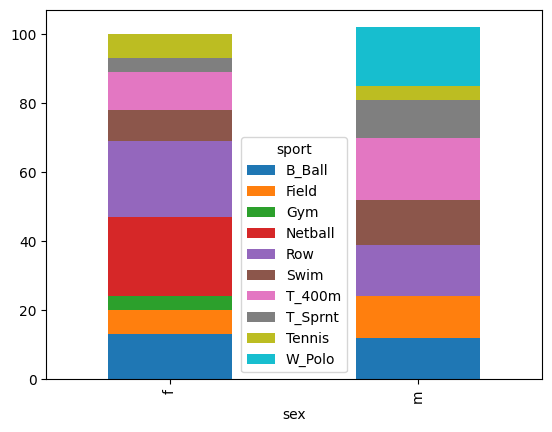

In [22]:
observed.T.plot(kind='bar', stacked=True)

Chi-squared       : 53.1673
Degrees of freedom: 9
P-value           : 0.0000


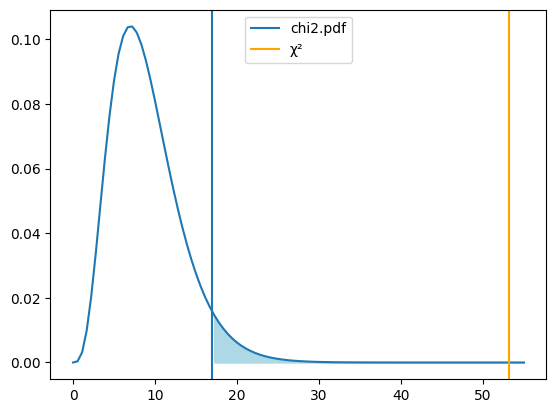

In [23]:
# Chi-squared test for independence based on a contingency table
observed = pd.crosstab(ais.survey,ais.sex)
alpha=0.05
chi2, p, dof, expected = stats.chi2_contingency(observed)

print("Chi-squared       : %.4f" % chi2)
print("Degrees of freedom: %d" % dof)
print("P-value           : %.4f" % p)
# Is there an association between Gender and Survey?

# x-values:
x = np.linspace(0, 55, num=100)
# probability density of the chi-squared distribution with 4 degrees of freedom
y = stats.chi2.pdf(x, df=dof)
# the number q for which the right tail probability is exactly 5%:
q = stats.chi2.isf(alpha, df=dof)  # TODO: CHECK this!

tplot = plt.gca()
tplot.plot(x, y,label="chi2.pdf")                     # probability density
tplot.fill_between(x, y, where=x>=q, # critical area
    color='lightblue')
tplot.axvline(q)                     # critical value
tplot.axvline(chi2, color='orange',label='χ²')  # chi-squared
tplot.legend()

# H5: Quantative/Qualitative data plots

## Data visualisation

The following chart types may be appropriate for this type of data:

- grouped boxplot or violin plot
- grouped density (kde-)plot
- bar chart with error bars

We'll use the dataset `tips`, included in the Seaborn package to illustrate these.

### Boxplot or violin plot

For a horizontal boxplot, map the independent (qualitative) variable on the Y-axis and the dependent (quantitative) variable on the X-axis. Swap for a vertical plot.

<Axes: xlabel='ht', ylabel='sex'>

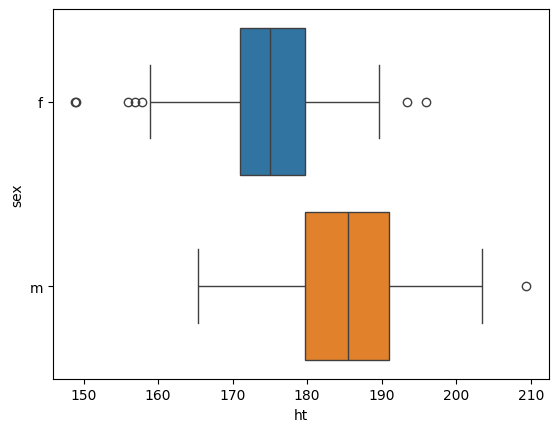

In [24]:

sns.boxplot(data=ais, x='ht', y='sex',hue='sex')

If there's a lot of overlap between the different groups, this indicates that there is no relation between both variables.

The violin plot works similarly:

<Axes: xlabel='ht', ylabel='sex'>

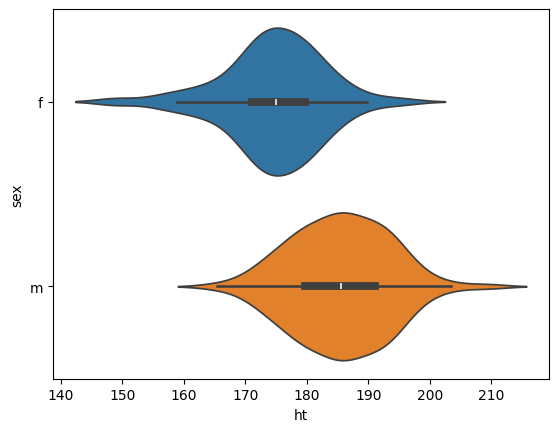

In [25]:
sns.violinplot(data=ais, x='ht', y='sex',hue='sex')

### Density plot

For a density (kernel density estimate) plot, map the independent (qualitative) variable on the `hue` attribute and the dependent variable on the X-axis.

<Axes: xlabel='ht', ylabel='Density'>

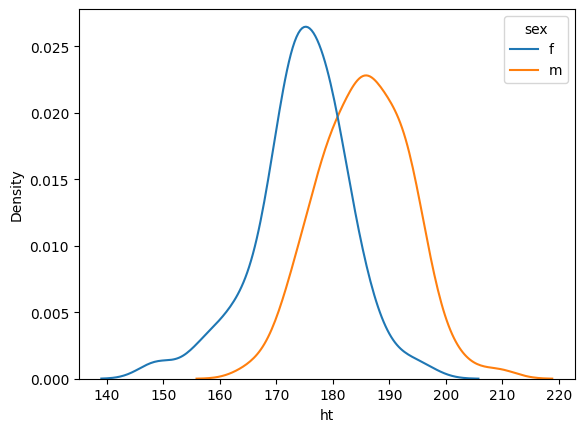

In [26]:
sns.kdeplot(data=ais, x='ht',hue='sex')

### Bar chart with error bars

Another chart type that is often used for this type of data is a bar plot of the sample mean of each group. However, watch out with this. Only showing the sample mean in a chart is insufficient to determine whether any difference between groups is significant. A chart should also show the dispersion in the data set. This can be visualized using error bars.

In the example below, the parameter `ci='sd'` will show the standard deviation:
!['img'](https://cdn.discordapp.com/attachments/447955757975994369/1249209177470144522/image.png?ex=66667835&is=666526b5&hm=44ad23dd87a19f8f15ef6deee1b9297f83fc4cc48261dedfdd25aa2b33a8740b&)

<Axes: xlabel='ht', ylabel='sex'>

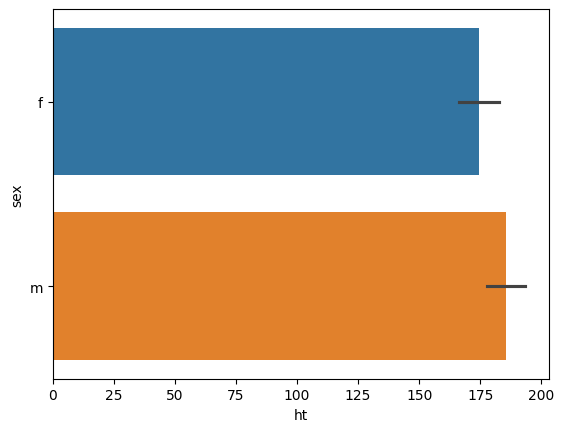

In [27]:
sns.barplot(data=ais, x='ht', y='sex',hue='sex',errorbar='sd')

# H6 : Quantitative/Quantitative data

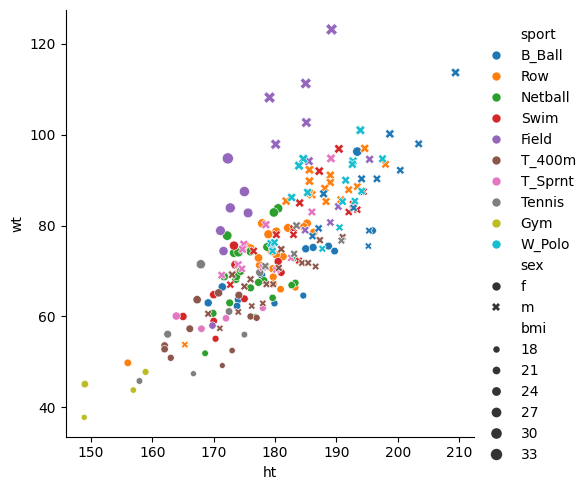

In [28]:
sns.relplot(data=ais,  x='ht', y='wt', hue='sport', style='sex',size='bmi')

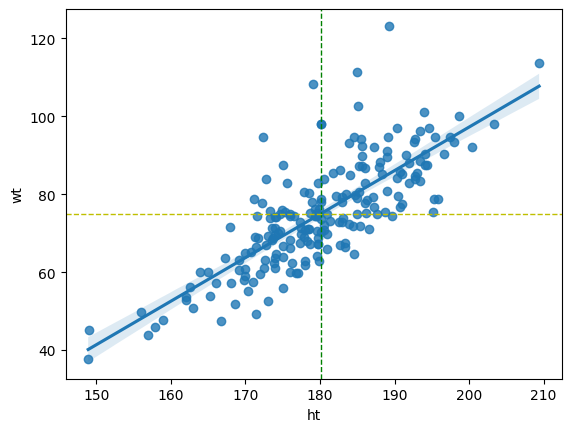

In [29]:
sns.regplot(data=ais,  x='ht', y='wt')
plt.axvline(ais.ht.mean(), lw=1, color='g', linestyle='dashed')  # Plot mean of x
plt.axhline(ais.wt.mean(), lw=1, color='y', linestyle='dashed')  # Plot mean of y

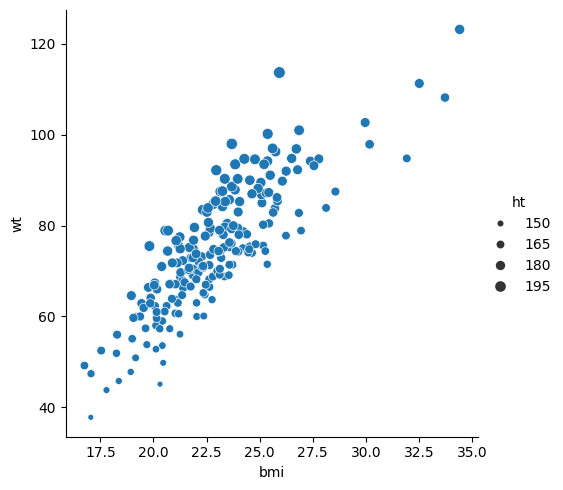

In [30]:
sns.relplot(data=ais, x='bmi', y='wt', size='ht')

### EXTRAS

In [31]:
Ur_column=ais["ht"]
print(f"Mean:                {Ur_column.mean()}")
print(f"Standard deviation:  {Ur_column.std()}") # Pay attention: n-1 in the denominator
print(f"Variance:            {Ur_column.var()}") # Pay attention: n-1 in the denominator
print(f"Skewness:            {Ur_column.skew()}")
print(f"Kurtosis:            {Ur_column.kurtosis()}")

# Median & co
print(f"Minimum:   {Ur_column.min()}")
print(f"Median:    {Ur_column.median()}")
print(f"Maximum:   {Ur_column.max()}")
percentiles = [0.0, 0.25, 0.5, 0.75, 1.0]
print("Percentiles", percentiles, "\n", Ur_column.quantile(percentiles))
print("Inter Quartile Range:", Ur_column.quantile(.75) - Ur_column.quantile(.25))
print(f"Range :    {Ur_column.max() - Ur_column.min()}")

Mean:                180.1039603960396
Standard deviation:  9.73449445257328
Variance:            94.76038224717995
Skewness:            -0.200796950872672
Kurtosis:            0.5717271416509662
Minimum:   148.9
Median:    179.7
Maximum:   209.4
Percentiles [0.0, 0.25, 0.5, 0.75, 1.0] 
 0.00    148.900
0.25    174.000
0.50    179.700
0.75    186.175
1.00    209.400
Name: ht, dtype: float64
Inter Quartile Range: 12.174999999999983
Range :    60.5
